#Customer Churn Prediction

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [366]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [367]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [369]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [370]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [371]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [372]:
df['Churn']= df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [373]:
contract_counts = df['Contract'].value_counts()
print(contract_counts)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [374]:
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")

Dataset shape: (7043, 21)
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [375]:
churn_rate = df['Churn'].value_counts(normalize=True)
print(churn_rate)
print(f"Overall churn rate: {churn_rate.loc[1] if 1 in churn_rate.index else churn_rate.loc['1']:.2%}")

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Overall churn rate: 26.54%


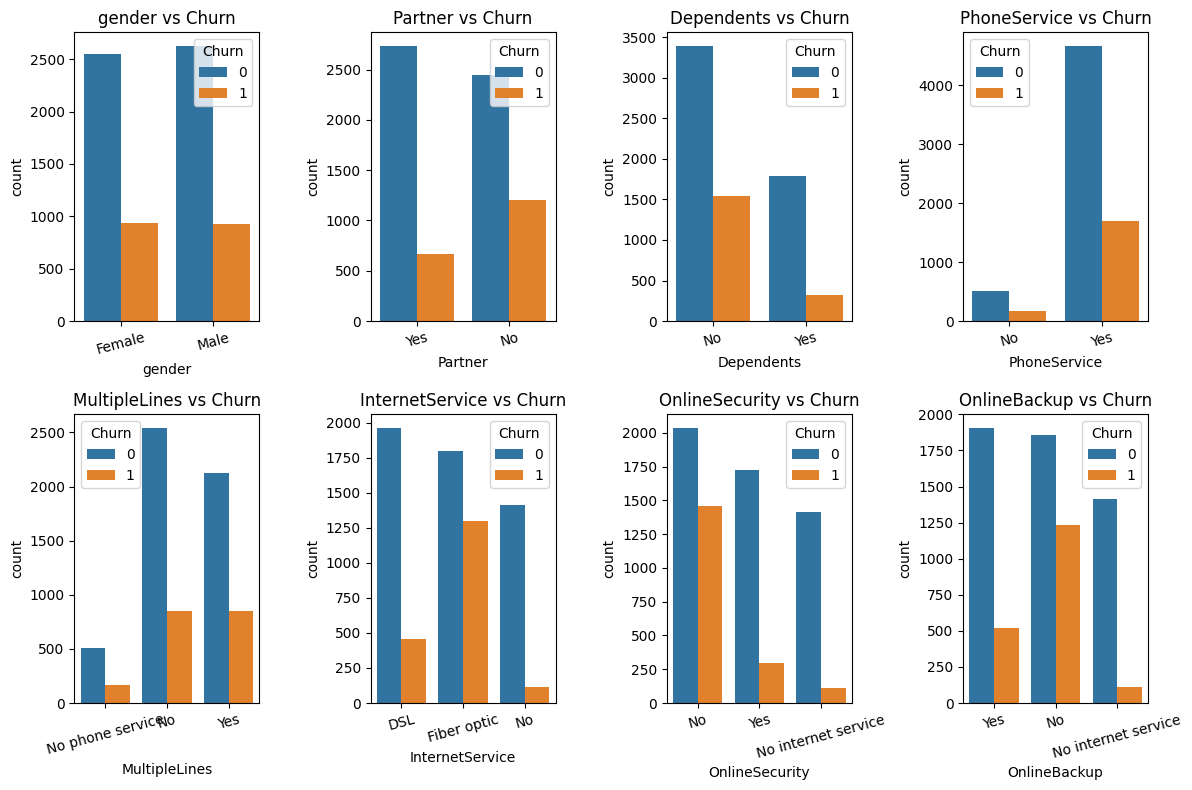

In [376]:
plt.figure(figsize=(12, 8))
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
'InternetService', 'OnlineSecurity', 'OnlineBackup']

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xticks(rotation=15)


plt.tight_layout()
plt.show()

In [377]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Don't encode the ID
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

Creating Binary Encodings for Yes/No Features


In [378]:
for col in categorical_cols:
    if df[col].nunique() == 2:
        unique_values = df[col].unique()
        if set(unique_values) == {'Yes', 'No'}:
            df[col] = df[col].map({'Yes': 1, 'No': 0})

Binary Encodings for features with an Extra Unique Value

In [379]:
for col in categorical_cols:
    if df[col].nunique() == 3:
        unique_values = df[col].unique()
        if set(unique_values) == {'No', 'Yes', 'No phone service'}:
            df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0})
        elif set(unique_values) == {'No', 'Yes', 'No internet service'}:
            df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

        

In [380]:
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)

df = pd.get_dummies(df, columns=['InternetService'], drop_first=True)

df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)



In [381]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values (if any) in TotalCharges
df['TotalCharges'].fillna(0, inplace=True)

# Create the MonthlyToTotalRatio column
df['MonthlyToTotalRatio'] = df['MonthlyCharges'] / df['TotalCharges']


C:\Users\Pruthvi\AppData\Local\Temp\ipykernel_720\1722489286.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [382]:
# Check for missing values in the new column
missing_values = df['MonthlyToTotalRatio'].isnull().sum()
print(f"Missing values in MonthlyToTotalRatio: {missing_values}")

Missing values in MonthlyToTotalRatio: 0


In [383]:
service_columns = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServices'] = df[service_columns].sum(axis=1)

In [384]:
df['AvgSpendPerService'] = df.apply(
    lambda row: row['MonthlyCharges'] / (row['NumServices']) if row['NumServices'] != 0 else np.nan, axis=1
) 

In [385]:
df['MonthlyChargesBin'] = pd.qcut(df['MonthlyCharges'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [386]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyToTotalRatio,NumServices,AvgSpendPerService,MonthlyChargesBin
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,False,False,False,False,True,False,1.000000,1,29.850000,Low
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,False,False,False,False,False,True,0.030140,3,18.983333,Medium
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,False,False,False,False,False,True,0.497920,3,17.950000,Medium
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,False,False,False,False,False,False,0.022980,3,14.100000,Medium
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,False,True,False,False,True,False,0.466205,1,70.700000,High
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,False,True,False,False,True,False,0.121450,4,24.912500,Very High
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,...,False,True,False,True,False,False,0.045706,3,29.700000,High
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,...,False,False,False,False,False,True,0.098543,1,29.750000,Low
8,7892-POOKP,0,0,1,0,28,1,1,0,0,...,False,True,False,False,True,False,0.034405,5,20.960000,Very High
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,False,False,False,False,False,False,0.016098,3,18.716667,Medium


EDA: Customer Segmentation
Use clustering to identify distinct customer segments

In [387]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [388]:
cluster_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumServices']
X_cluster = df[cluster_features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

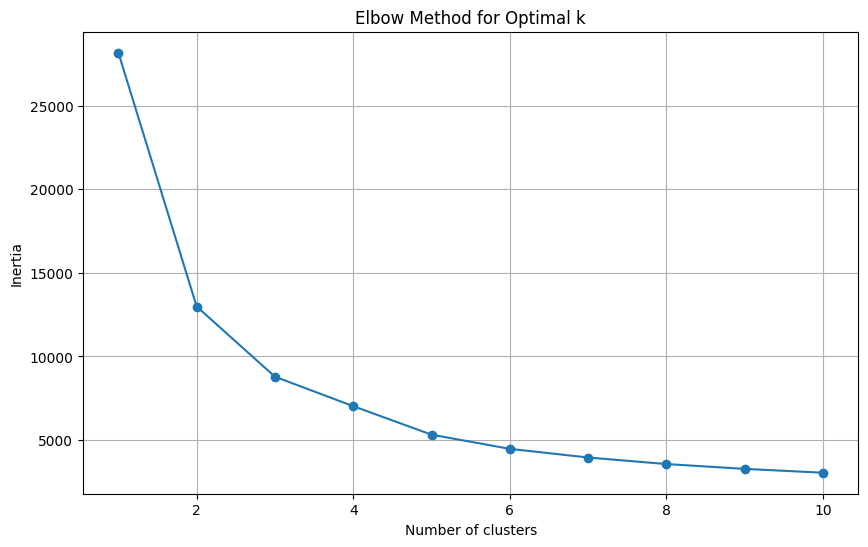

In [389]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

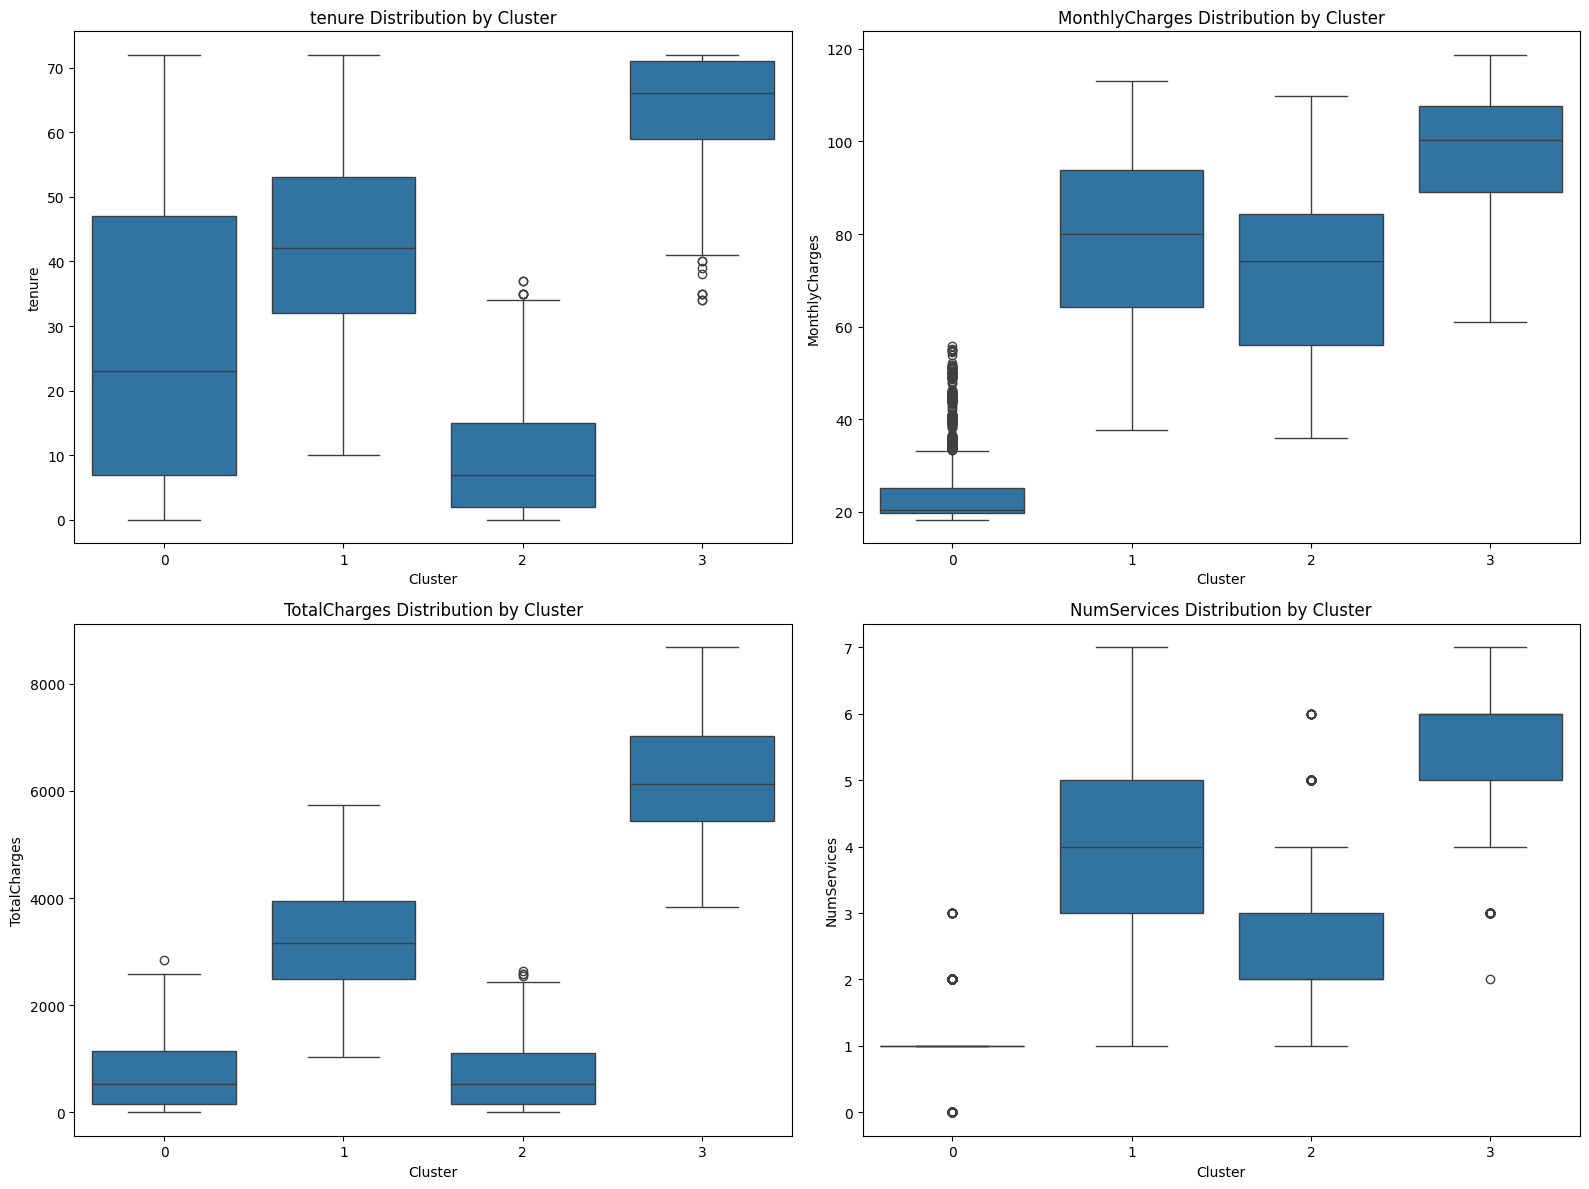

In [390]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze churn by cluster
cluster_churn = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()
cluster_churn['ChurnRate'] = cluster_churn[1]
cluster_churn.sort_values('ChurnRate', ascending=False)

# Visualize cluster profiles
plt.figure(figsize=(16, 12))

for i, feature in enumerate(cluster_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')

plt.tight_layout()
plt.show()

In [391]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

# Prepare features and target
X = df.drop(['customerID', 'Churn', 'Cluster'], axis=1)  # Drop non-feature columns
y = df['Churn']

# Handle any remaining categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

In [392]:
# Define model evaluation function
def evaluate_model(model, X, y, cv=5):
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Cross-validation
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Calculate scores
    accuracy = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='accuracy').mean()
    precision = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='precision').mean()
    recall = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='recall').mean()
    f1 = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='f1').mean()
    roc_auc = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='roc_auc').mean()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

In [393]:
# Convert all bool columns to integers
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Convert categorical columns to numeric codes
cat_cols = X.select_dtypes(include='category').columns
for col in cat_cols:
    X[col] = X[col].astype('category').cat.codes

# Ensure everything is numeric
# = X.apply(pd.to_numeric, errors='coerce')
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill any NaNs just in case
X = X.fillna(0)


In [394]:
# Ensure y does not contain NaN values
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y[y==0])/len(y[y==1]))  # Handle class imbalance
}

# Evaluate all models
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X, y)

# Compare results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)
print(results_df)

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.748686   0.516961  0.808443  0.630618  0.849810
Gradient Boosting    0.800794   0.660676  0.512029  0.576418  0.846252
Random Forest        0.791848   0.635837  0.476181  0.543716  0.827721
XGBoost              0.760185   0.538894  0.672557  0.598233  0.825603


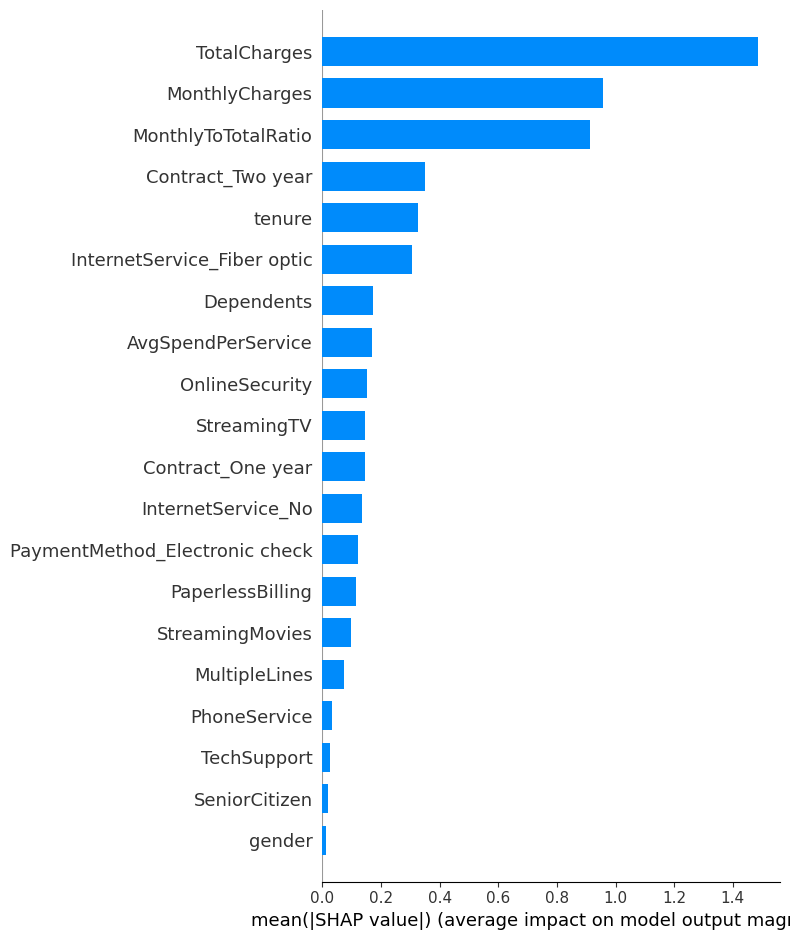

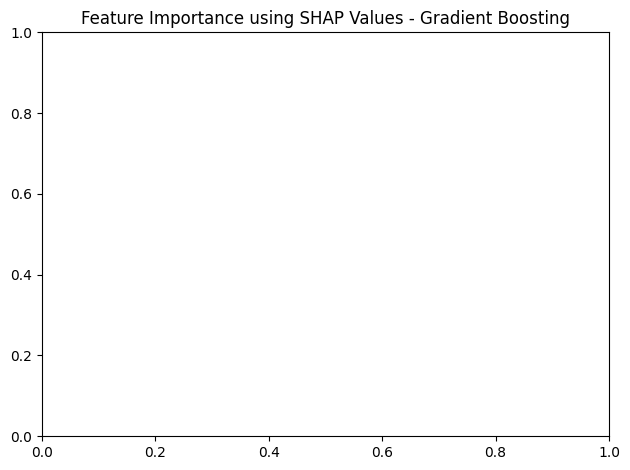

<Figure size 1400x2000 with 0 Axes>

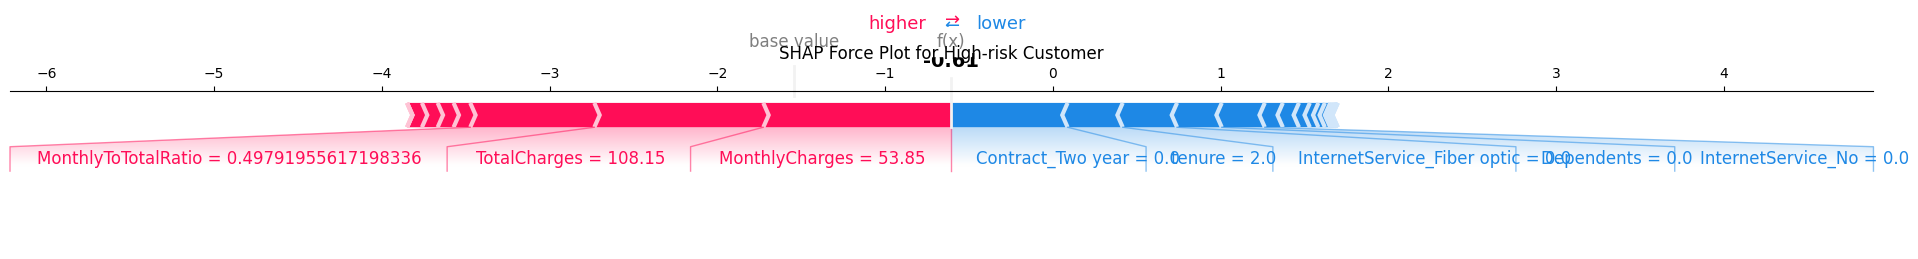

In [405]:
import shap
shap.initjs()
# Use the best performing model (determined from previous step)
best_model_name = results_df.index[1]  # Get name of best model
best_model = models[best_model_name]

# Train the best model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
pipeline.fit(X, y)

# Extract trained model from pipeline
trained_model = pipeline.named_steps['model']

# Create a SHAP explainer
if best_model_name in ['Random Forest', 'XGBoost', 'Gradient Boosting']:
    explainer = shap.TreeExplainer(trained_model)
    # Get SHAP values for a sample of data
    X_sample = X.sample(min(1000, len(X)), random_state=42)
    shap_values = explainer.shap_values(X_sample)
    
    # Plot SHAP summary
    plt.figure(figsize=(20, 20))
    shap.summary_plot(shap_values, X_sample, plot_type="bar")
    plt.title(f'Feature Importance using SHAP Values - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    # Individual explanation plot for a high-risk customer
    high_risk_idx = y.idxmax()  # Just an example, you can choose any customer
    plt.figure(figsize=(14, 20))
    shap.force_plot(explainer.expected_value, 
                   shap_values[high_risk_idx,:], 
                   X.iloc[high_risk_idx,:], 
                   matplotlib=True,
                   show=False)
    plt.title(f'SHAP Force Plot for High-risk Customer')
    plt.tight_layout()
    plt.show()

